In [1]:
import qiskit
import numpy as np

In [2]:
""" 
    Qiskit
    https://qiskit.org/documentation/getting_started.html
"""
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# |x, y> => |x, y ⊕ f(x)>
# y = (|0> - |1>)/√2 (或是寫成 |->)
# => |x> ⊗ (|0 ⊕ f(x)> - |1 ⊕ f(x)>) /√2 
# binary XOR 跟 NOT 一樣
# => |x> ⊗ (|f(x)> - |not f(x)>) /√2 
# x = 0,  |x>|y>  (+ 正的)
# x = 1, -|x>|y>  (- 負的)
# 寫成一起: (-1)^f(x) |x>|y>
# x = (|0> + |1>)/√2

Result are: {'101': 1024}


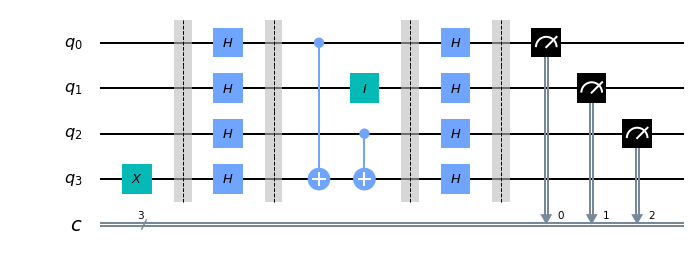

In [3]:
"""
    Bernstein-Vazirani algorithm:
    https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html
"""
# 給一個 Oracle f:{0, 1}^n -> {0, 1} 
# 相對於 Deutsch-Jozsa 要判斷 f(x) 是否 constant 
# 這邊 f(x) 是 x 與某個秘密 string s={0, 1}^n 的 dot product (mod 2) 
# f(x) 會 return s Dot x (mod 2)
# 請求出 s 
simulator = Aer.get_backend('qasm_simulator')

# 需要 3 qubit + 1 control qubit
s = "101"
circuit = QuantumCircuit(4, 3)

circuit.x(3) #(=Not gate) 讓 qubit 3 (第四個) 的輸入是 1
circuit.barrier()
circuit.h([0, 1, 2, 3]) # 0~3 都放上 H gates
circuit.barrier()

# Uf 的部分
# s = 101
# 以下都會讓 f(x) = 1
# 001
# 011
# 100
# 110
# 變成 -|x>
s = s[::-1] # 為了 qiskit 順序
for i, word in enumerate(s):
    if word == '1':
        circuit.cx(i, 3) #與 conrol bit 互動
    else:
        circuit.i(i) # I gate 就是不做事，只是為了清楚說明
# with cx (CNOT)
# (|0>+|1>)(|0>-|1>) 
# => (|0>+|1>)(|1>-|0>)
# => -(|0>+|1>)(|0>-|1>) #要讓負號往前就要cnot
# (cx, i, cx)
# 直接實作 apply Uf 後的輸出
# (-|+> |+> -|+>) |-> (control qubit)
# 得到 101
circuit.barrier()
# 注意! cx, CNot 其實如下
# [1 0 0 0]
# [0 1 0 0]
# [0 0 0 1]
# [0 0 1 0]
# |10> to |11>, |11> to |10>

# final H gate
# *H gate 除了會讓 000 變成疊加 -> 疊加態 inverse 也是 H 回推到 000 
# 所以藉由 H gates 讓 ½(|00> + |01> - |10> - |11>)  變回 |10> 
circuit.h([0, 1, 2, 3])
circuit.barrier()

# Map the quantum measurement to the classical bits
circuit.measure([0, 1, 2], [0, 1, 2])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("Result are:",counts)

# Draw the circuit
circuit.draw(output='mpl')
# 順序 q1(y) q0(x) ..

Result are: {'001': 1024}


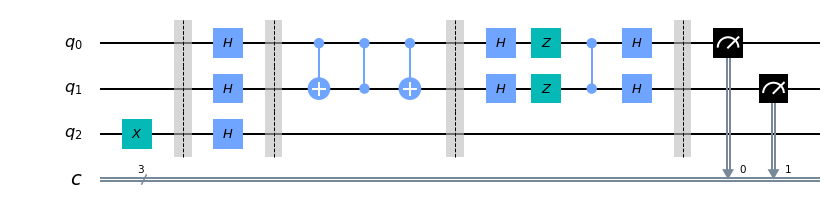

In [4]:
"""
    Simon's Algorithm
    https://qiskit.org/textbook/ch-algorithms/simon.html
"""
#
#
#

simulator = Aer.get_backend('qasm_simulator')

# 2 個 qubit 當輸入可能， 1 個 control qubit
circuit = QuantumCircuit(3, 3)

circuit.x(2) #(=Not gate) 讓 qubit 2 (第三個) 的輸入是 1 (control qubit)
circuit.barrier()
circuit.h([0, 1, 2]) # 0~2 都放上 H gates
circuit.barrier()

# Uf (Quantum Oracle)

circuit.barrier()

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("Result are:",counts)

# Draw the circuit
circuit.draw(output='mpl')
# 順序 q2, q1, q0, ...
# 答案確實為 10 (q0, q1)